In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

In [32]:
data_set = np.genfromtxt("data_set.csv", delimiter = ",", skip_header=True)

x_train = np.zeros(150)
y_train = np.zeros(150)
x_test = np.zeros(122)
y_test = np.zeros(122)

x_train[:] = data_set[:150,0]
y_train[:] = data_set[:150,1]
x_test[:] = data_set[150:,0]
y_test[:] = data_set[150:,1]

train_n = len(y_train)
test_n=len(y_test)

# Tree Inference

In [33]:
def decision_tree_reg(P, train_n, x_train, y_train):
    
    node_indices = {}
    is_terminal = {}
    need_split = {}
    node_splits = {}
  
    # put all training instances into the root node
    node_indices[1] = np.array(range(train_n))
    is_terminal[1] = False
    need_split[1] = True
  
    while True:
      
        split_nodes = [key for key, value in need_split.items() if value == True]
   
        if len(split_nodes) == 0:
            break

        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False

            if len(data_indices) <= P:
                node_splits[split_node] = np.mean(y_train[data_indices])
                is_terminal[split_node] = True
            else:
                is_terminal[split_node] = False
                unique_values = np.sort(np.unique(x_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))

                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] <= split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] > split_positions[s]]
                    error=0
                    left_mean = np.mean(y_train[left_indices])
                    right_mean = np.mean(y_train[right_indices])
                    error = error + np.sum((y_train[left_indices]-left_mean)**2) + np.sum((y_train[right_indices] - right_mean) ** 2)
                    split_scores[s] = error / (len(left_indices) + len(right_indices))

                best_splits = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_splits

                left_indices = data_indices[x_train[data_indices] <= best_splits]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True

                right_indices = data_indices[x_train[data_indices] > best_splits]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
        
    return is_terminal, node_splits

# Regression

In [34]:
def get_regression_results(data, node_splits, is_terminal):
    N = data.shape[0]
    regression_results = np.zeros(N)
    for i in range(N):
        tree_index = 1
        while True:
            if is_terminal[tree_index] == True:
                regression_results[i] = node_splits[tree_index]
                break
            else:
                if data[i] <= node_splits[tree_index]:
                    tree_index *= 2
                else:
                    tree_index *= 2
                    tree_index += 1
    return regression_results

# Rmse

In [35]:
def get_rmse(y_truth, y_pred):
    return np.sqrt(np.mean((y_truth - y_pred)**2))

# Results

In [36]:
data_interval = np.linspace(1.8, 5.1, 500)
is_terminal = decision_tree_reg(25, train_n, x_train, y_train)[0]
node_splits = decision_tree_reg(25, train_n, x_train, y_train)[1]
regression_results = get_regression_results(data_interval, node_splits, is_terminal)


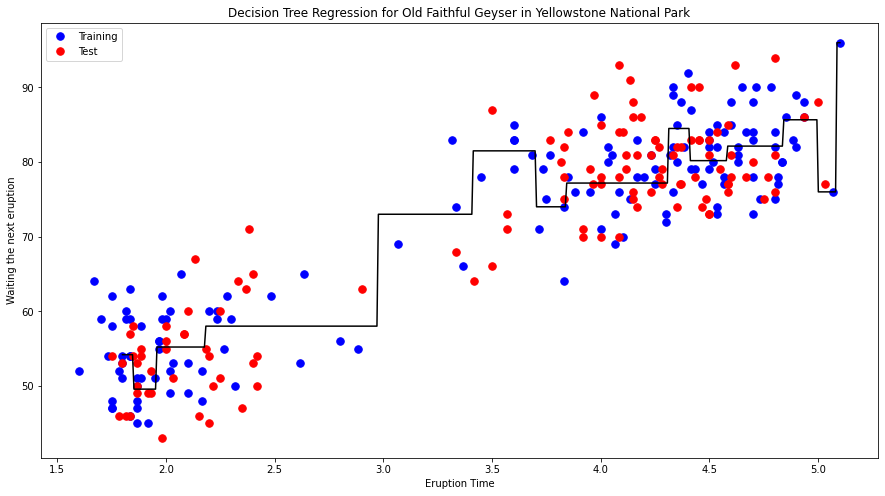

In [37]:
plt.figure(figsize = (15, 8))
plt.plot(x_train,y_train,"b.", markersize = 15,label="Training")
plt.plot(x_test,y_test,"r.", markersize = 15,label="Test")
    
plt.plot(data_interval, regression_results, "k-")

plt.xlabel("Eruption Time")
plt.ylabel("Waiting the next eruption")
plt.title("Decision Tree Regression for Old Faithful Geyser in Yellowstone National Park")

plt.legend(loc='upper left')
plt.show()

# Training and Test Performance

In [38]:
train_results = get_regression_results(x_train, node_splits, is_terminal)
rmse_train = get_rmse(y_train, train_results)
test_results = get_regression_results(x_test, node_splits, is_terminal)
rmse_test = get_rmse(y_test, test_results)
print("RMSE on training set is {:.15f} when P is 25".format(rmse_train))
print("RMSE on test set is {:.15f} when P is 25".format(rmse_test))

RMSE on training set is 4.541214189194451 when P is 25
RMSE on test set is 6.454083413352087 when P is 25


# Training vs Test Plot

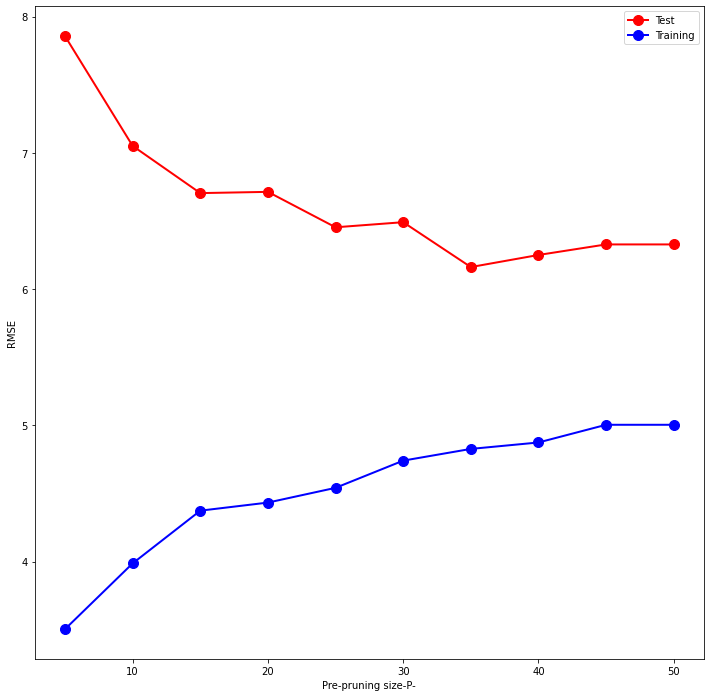

In [39]:
rmse_values_test = np.zeros(10)
rmse_values_train = np.zeros(10)
p_values = np.arange(5, 55, 5)

for i in range(p_values.shape[0]):
    is_terminal_iter = decision_tree_reg(p_values[i], train_n, x_train, y_train)[0]
    node_splits_iter = decision_tree_reg(p_values[i], train_n, x_train, y_train)[1]
    rmse_values_test[i] = get_rmse(y_test, get_regression_results(x_test, node_splits_iter, is_terminal_iter))
    rmse_values_train[i] = get_rmse(y_train, get_regression_results(x_train, node_splits_iter, is_terminal_iter))
    

    
plt.figure(figsize = (12, 12))
plt.plot(p_values, rmse_values_test, "ro-", linewidth=2, markersize = 10,label="Test")
plt.plot(p_values, rmse_values_train, "bo-", linewidth=2, markersize = 10,label="Training")
plt.xlabel("Pre-pruning size-P-")
plt.ylabel("RMSE")
plt.legend(loc='upper right')
plt.show()

